# Otto Group Product Classification Challenge

## 背景介绍
奥托集团是世界上最大的电子商务公司之一，在20多个国家设有子公司。该公司每天都在世界各地销售数百万种产品,所以对其产品根据性能合理的分类非常重要。

不过,在实际工作中,工作人员发现,产品存在大量的五分类。本案例要求,你对奥拓集团的产品进行正确的分分类。尽可能的提供分类的准确性。

链接：https://www.kaggle.com/c/otto-group-product-classification-challenge/overview


## 数据集介绍

- 本案例中，数据集包含大约200,000种产品的93个特征。
- 其目的是建立一个能够区分otto公司主要产品类别的预测模型。
- 所有产品共被分成九个类别（例如时装，电子产品等）。

## 评分标准

![avatar](../source/103.jpg) 

- i表示样本，j表示类别。$p_{ij}$代表第i个样本属于类别j的概率
- 如果第i个样本真的属于类别j，则$y_{ij}$等于1，否则为0。
- 根据上公式，假如你将所有的测试样本都正确分类，所有$p_{ij}$都是1，那每个log($p_{ij}$)都是0，最终的logloss也是0。
- 假如第1个样本本来是属于1类别的，但是你给它的类别概率$p_{ij}$=0.1，那logloss就会累加上log(0.1)这一项。我们知道这一项是负数，而且$p_{ij}$越小，负得越多，如果$p_{ij}$=0，将是无穷。这会导致这种情况：你分错了一个，logloss就是无穷。这当然不合理，为了避免这一情况，我们对非常小的值做如下处理：$max(min(p, 1-10^{-15}),10^{-15})$
- 也就是说最小不会小于$10^{-15}$

- 实际上,上述损失函数如果是对于二分类问题,就可以简化为:
![avatar](../source/104.jpg) 

## 流程分析

- 获取数据
- 数据基本处理
    - 数据量比较大，尝试是否可以进行数据分割
    - 转换目标值表示方式
- 模型训练
- 模型基本训练

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#category是一个属性,里面是枚举类型的值,这个柱状图可以展示各个类型的数量,category类似[1,2,3,2,1,3,3]
def show_category_bar(category):
    sns.countplot(category)
    plt.show()

In [2]:
data = pd.read_csv("../data/otto/train.csv")
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [3]:
data.shape

(61878, 95)

In [4]:
data.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


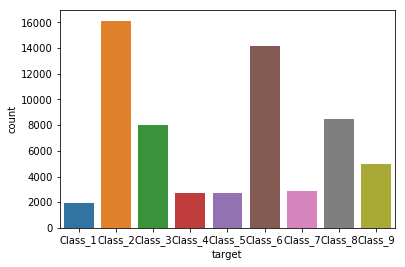

In [9]:
#查看这个类别的数量
show_category_bar(data.target)

由上图可以看出,该数据类别不均衡,所以需要后期处理

数据基本处理
数据已经经过脱敏,不再需要特殊处理

截取部分数据¶

In [10]:
new1_data = data[:10000]
new1_data.shape

(10000, 95)

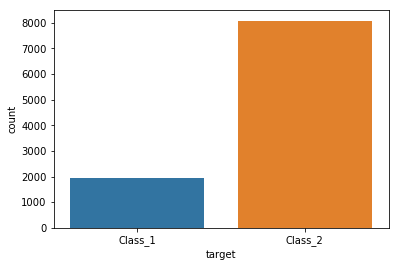

In [11]:
#查看这个类别的数量
show_category_bar(new1_data.target)

显然,我们直接截取的数据只有 2 个类别,所以这种截取方式不可取

### 随机欠采样

In [12]:
# 随机欠采样获取数据
# 首先需要确定特征值\标签值

y = data["target"]
x = data.drop(["id", "target"], axis=1)
x.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [13]:
# 欠采样获取数据
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

X_resampled, y_resampled = rus.fit_resample(x, y)

In [14]:
x.shape, y.shape

((61878, 93), (61878,))

In [15]:
X_resampled.shape, y_resampled.shape

((17361, 93), (17361,))

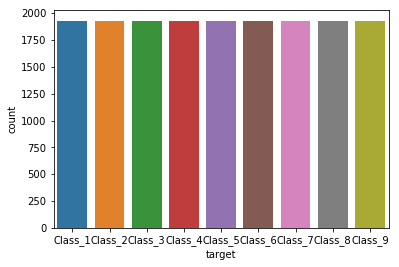

In [17]:
show_category_bar(y_resampled)

### 把标签值转换为数字

In [19]:
y_resampled.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_resampled = le.fit_transform(y_resampled)
y_resampled[:5]

array([0, 0, 0, 0, 0])

### 分割数据

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)
x_train.shape, y_train.shape

((13888, 93), (13888,))

## 模型训练
### 基本模型训练

In [23]:
from sklearn.ensemble import RandomForestClassifier

#oob_score=True,使用包外估计
rf = RandomForestClassifier(oob_score=True)
rf.fit(x_train, y_train)

RandomForestClassifier(oob_score=True)

In [24]:
y_pre = rf.predict(x_test)
y_pre

array([4, 0, 4, ..., 2, 6, 2])

In [25]:
rf.score(x_test, y_test)

0.7831845666570688

In [26]:
#使用包外估计
rf.oob_score_

0.7586405529953917

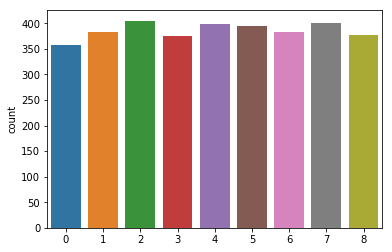

In [27]:
show_category_bar(y_pre)

In [28]:
# logloss模型评估
from sklearn.metrics import log_loss

log_loss(y_test, y_pre, eps=1e-15, normalize=True)

ValueError: y_true and y_pred contain different number of classes 9, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0 1 2 3 4 5 6 7 8]

上面报错原因:logloss使用过程中,必须要求将输出用one-hot表示,

需要将这个多类别问题的输出结果通过OneHotEncoder修改为如下:

In [31]:
y_test.reshape(-1, 1)
y_pre.reshape(-1, 1)[:5]

array([[4],
       [0],
       [4],
       [2],
       [5]])

In [32]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse=False)

y_test1 = one_hot.fit_transform(y_test.reshape(-1, 1))
y_pre1 = one_hot.fit_transform(y_pre.reshape(-1, 1))

In [33]:
y_test1[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [36]:
# logloss模型评估

log_loss(y_test1, y_pre1, eps=1e-15, normalize=True)

7.488539771197171

In [38]:
# 改变预测值的输出模式,让输出结果为百分占比,降低logloss值
y_pre_proba = rf.predict_proba(x_test)
y_pre_proba[:5]

array([[0.01, 0.01, 0.  , 0.01, 0.93, 0.  , 0.01, 0.02, 0.01],
       [0.43, 0.03, 0.  , 0.  , 0.01, 0.07, 0.01, 0.03, 0.42],
       [0.02, 0.08, 0.01, 0.01, 0.79, 0.  , 0.05, 0.  , 0.04],
       [0.02, 0.13, 0.74, 0.02, 0.  , 0.03, 0.01, 0.05, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ]])

In [39]:
# logloss模型评估

log_loss(y_test1, y_pre_proba, eps=1e-15, normalize=True)

0.7503067916598026

## 模型调优
n_estimators, max_feature, max_depth, min_samples_leaf

确定最优的n_estimators

In [67]:
# 优化结果过程可视化
def show_para_tune(x, y1, y2, x_label, y1_label, y2_label):
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 4), dpi=100)
    axes[0].plot(x, y1)
    axes[1].plot(x, y2)
    
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel(y1_label)
    
    axes[1].set_xlabel(x_label)
    axes[1].set_ylabel(y2_label)
    
    axes[0].grid(True)
    axes[1].grid(True)
    plt.show()

In [68]:
# 确定n_estimators的取值范围
tuned_parameters = range(10, 200, 10)

# 创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

# 创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

# 调优过程实现
for j, one_parameter in enumerate(tuned_parameters):
    rf2 = RandomForestClassifier(n_estimators=one_parameter, 
                                 max_depth=10, 
                                 max_features=10, 
                                 min_samples_leaf=10, 
                                 oob_score=True, 
                                 random_state=0, 
                                 n_jobs=-1)
    
    rf2.fit(x_train, y_train)
    
    # 输出accuracy
    accuracy_t[j] = rf2.oob_score_
    
    # 输出log_loss
    y_pre = rf2.predict_proba(x_test)
    error_t[j] = log_loss(y_test, y_pre, eps=1e-15, normalize=True)
    
    print(error_t)

[1.1178663 0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.       ]
[1.1178663  1.10979586 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.1178663  1.10979586 1.11272415 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.1178663  1.10979586 1.11272415 1.11167897 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.1178663  1.10979586 1.11272415 1.11167897 1.11007101 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.1178663  1.10979586 1.11272415 1.11167897 1.11007101 1.10

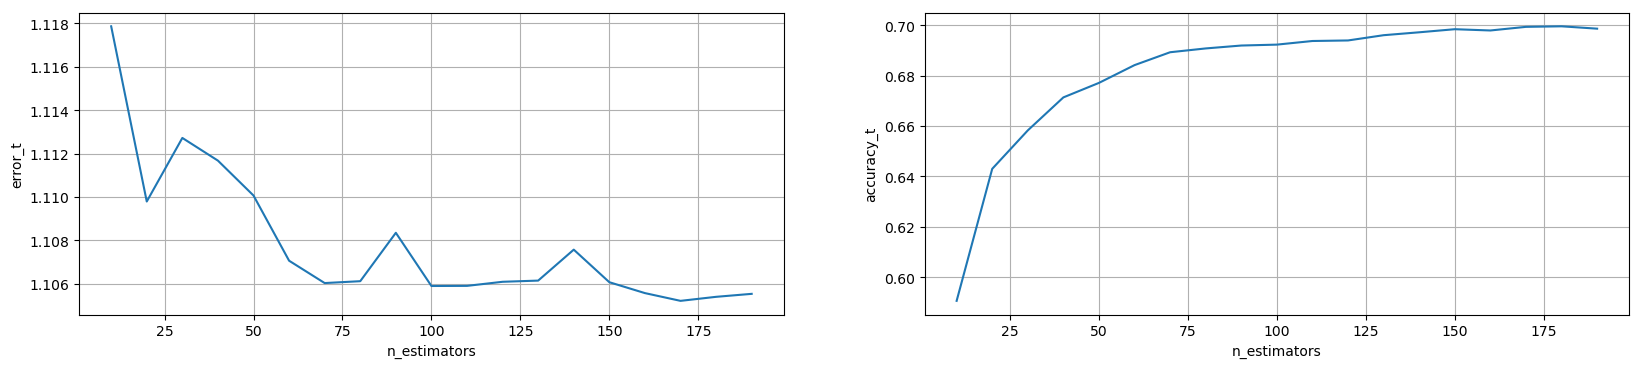

In [69]:
show_para_tune(tuned_parameters, error_t, accuracy_t, "n_estimators", "error_t", "accuracy_t")

经过图像展示,最后确定n_estimators=175的时候,表现效果不错

## 确定最优的max_features¶

In [70]:

tuned_parameters = range(5, 40, 5)

# 创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

# 创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

# 调优过程实现
for j, one_parameter in enumerate(tuned_parameters):
    rf2 = RandomForestClassifier(n_estimators=175, 
                                 max_depth=10, 
                                 max_features=one_parameter, 
                                 min_samples_leaf=10, 
                                 oob_score=True, 
                                 random_state=0, 
                                 n_jobs=-1)
    
    rf2.fit(x_train, y_train)
    
    # 输出accuracy
    accuracy_t[j] = rf2.oob_score_
    
    # 输出log_loss
    y_pre = rf2.predict_proba(x_test)
    error_t[j] = log_loss(y_test, y_pre, eps=1e-15, normalize=True)
    
    print(error_t)

[1.19852927 0.         0.         0.         0.         0.
 0.        ]
[1.19852927 1.10561489 0.         0.         0.         0.
 0.        ]
[1.19852927 1.10561489 1.06712168 0.         0.         0.
 0.        ]
[1.19852927 1.10561489 1.06712168 1.0488305  0.         0.
 0.        ]
[1.19852927 1.10561489 1.06712168 1.0488305  1.04598628 0.
 0.        ]
[1.19852927 1.10561489 1.06712168 1.0488305  1.04598628 1.04065236
 0.        ]
[1.19852927 1.10561489 1.06712168 1.0488305  1.04598628 1.04065236
 1.04285696]


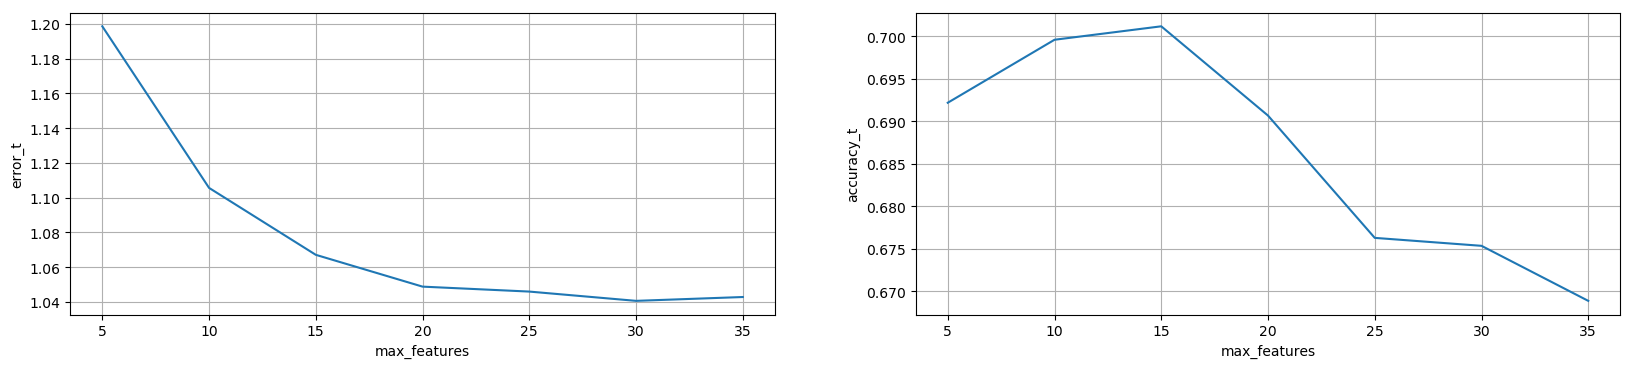

In [71]:
show_para_tune(tuned_parameters, error_t, accuracy_t, "max_features", "error_t", "accuracy_t")

经过图像展示,最后确定max_features=15的时候,表现效果不错

确定最优的max_depth¶

In [72]:
tuned_parameters = range(10, 100, 10)

# 创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

# 创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

# 调优过程实现
for j, one_parameter in enumerate(tuned_parameters):
    rf2 = RandomForestClassifier(n_estimators=175, 
                                 max_depth=one_parameter, 
                                 max_features=15, 
                                 min_samples_leaf=10, 
                                 oob_score=True, 
                                 random_state=0, 
                                 n_jobs=-1)
    
    rf2.fit(x_train, y_train)
    
    # 输出accuracy
    accuracy_t[j] = rf2.oob_score_
    
    # 输出log_loss
    y_pre = rf2.predict_proba(x_test)
    error_t[j] = log_loss(y_test, y_pre, eps=1e-15, normalize=True)
    
    print(error_t)

[1.06712168 0.         0.         0.         0.         0.
 0.         0.         0.        ]
[1.06712168 0.8485134  0.         0.         0.         0.
 0.         0.         0.        ]
[1.06712168 0.8485134  0.82877576 0.         0.         0.
 0.         0.         0.        ]
[1.06712168 0.8485134  0.82877576 0.82643408 0.         0.
 0.         0.         0.        ]
[1.06712168 0.8485134  0.82877576 0.82643408 0.82630474 0.
 0.         0.         0.        ]
[1.06712168 0.8485134  0.82877576 0.82643408 0.82630474 0.82630474
 0.         0.         0.        ]
[1.06712168 0.8485134  0.82877576 0.82643408 0.82630474 0.82630474
 0.82630474 0.         0.        ]
[1.06712168 0.8485134  0.82877576 0.82643408 0.82630474 0.82630474
 0.82630474 0.82630474 0.        ]
[1.06712168 0.8485134  0.82877576 0.82643408 0.82630474 0.82630474
 0.82630474 0.82630474 0.82630474]


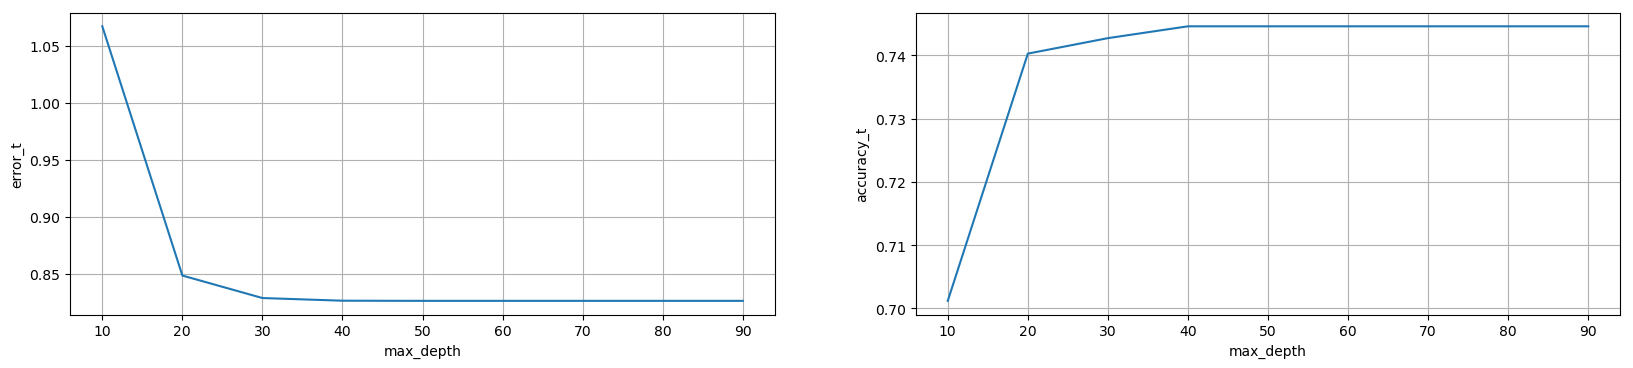

In [73]:
show_para_tune(tuned_parameters, error_t, accuracy_t, "max_depth", "error_t", "accuracy_t")

经过图像展示,最后确定max_depth=30的时候,表现效果不错

## 确定最优的min_sample_leaf

In [74]:
tuned_parameters = range(1, 10, 2)

# 创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

# 创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

# 调优过程实现
for j, one_parameter in enumerate(tuned_parameters):
    rf2 = RandomForestClassifier(n_estimators=175, 
                                 max_depth=30, 
                                 max_features=15, 
                                 min_samples_leaf=one_parameter, 
                                 oob_score=True, 
                                 random_state=0, 
                                 n_jobs=-1)
    
    rf2.fit(x_train, y_train)
    
    # 输出accuracy
    accuracy_t[j] = rf2.oob_score_
    
    # 输出log_loss
    y_pre = rf2.predict_proba(x_test)
    error_t[j] = log_loss(y_test, y_pre, eps=1e-15, normalize=True)
    
    print(error_t)

[0.70333265 0.         0.         0.         0.        ]
[0.70333265 0.74260183 0.         0.         0.        ]
[0.70333265 0.74260183 0.77376042 0.         0.        ]
[0.70333265 0.74260183 0.77376042 0.79874449 0.        ]
[0.70333265 0.74260183 0.77376042 0.79874449 0.81726242]


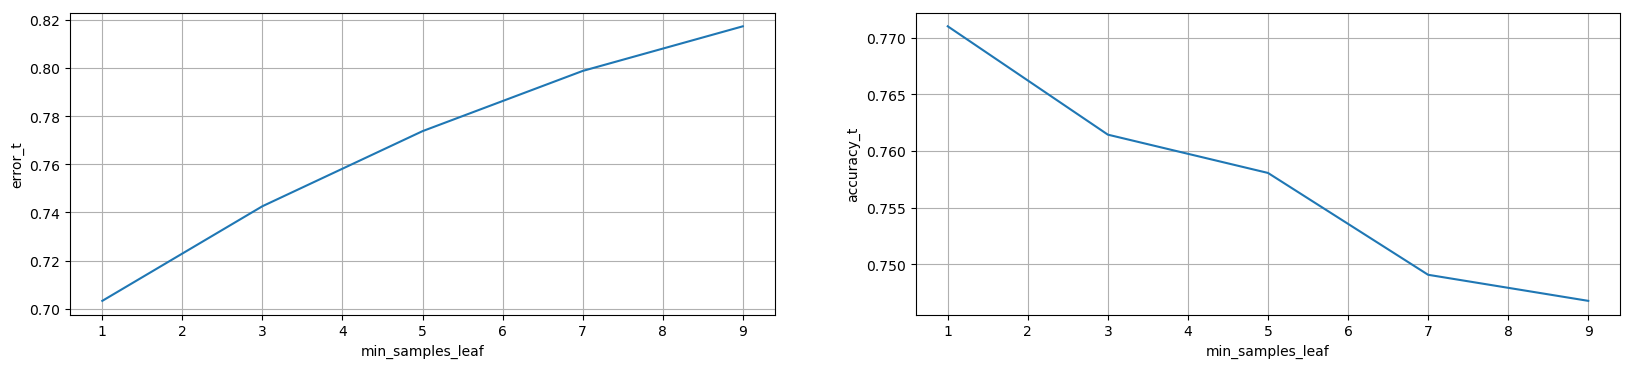

In [75]:
show_para_tune(tuned_parameters, error_t, accuracy_t, "min_samples_leaf", "error_t", "accuracy_t")

经过图像展示,最后确定min_sample_leaf=1的时候,表现效果不错

### 确定最优模型
n_estimators=175,

max_depth=30,

max_features=15,

min_samples_leaf=1,

In [52]:
rf3 = RandomForestClassifier(n_estimators=175, max_depth=30, max_features=15, min_samples_leaf=1, 
                             oob_score=True, random_state=40, n_jobs=-1)

rf3.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, max_features=15, n_estimators=175,
                       n_jobs=-1, oob_score=True, random_state=40)

In [53]:
rf3.score(x_test, y_test)

0.7831845666570688

In [54]:
rf3.oob_score_

0.7667770737327189

In [55]:
y_pre_proba1 = rf3.predict_proba(x_test)

log_loss(y_test, y_pre_proba1)

0.7065795949249997

### 生成提交数据

In [56]:
test_data = pd.read_csv("../data/otto/test.csv")
test_data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [57]:
test_data.shape

(144368, 94)

In [58]:
test_data_drop_id = test_data.drop(["id"], axis=1)
test_data_drop_id.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0


In [61]:
y_pre_test = rf3.predict_proba(test_data_drop_id)
y_pre_test[:5]

array([[1.14533086e-02, 7.48213292e-02, 1.14310451e-01, 7.58779990e-01,
        0.00000000e+00, 0.00000000e+00, 2.92063492e-02, 1.14285714e-02,
        0.00000000e+00],
       [8.02197802e-02, 3.42857143e-02, 5.14285714e-02, 1.71428571e-02,
        1.71428571e-02, 4.68351648e-01, 1.14285714e-02, 2.74285714e-01,
        4.57142857e-02],
       [5.71428571e-03, 5.71428571e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.71428571e-01, 1.14285714e-02, 5.71428571e-03,
        0.00000000e+00],
       [3.42857143e-02, 2.62077922e-01, 2.78051948e-01, 2.59740260e-01,
        1.29870130e-04, 5.71428571e-03, 1.71428571e-02, 5.71428571e-03,
        1.37142857e-01],
       [1.94168127e-01, 1.70831231e-03, 1.02150822e-03, 4.18552876e-04,
        6.83722293e-04, 7.86724607e-03, 4.85780975e-02, 1.70979972e-01,
        5.74574461e-01]])

In [62]:
result_data = pd.DataFrame(y_pre_test, columns=["Class_"+str(i) for i in range(1, 10)])
result_data.head()

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,0.011453,0.074821,0.114310,0.758780,0.000000,0.000000,0.029206,0.011429,0.000000
1,0.080220,0.034286,0.051429,0.017143,0.017143,0.468352,0.011429,0.274286,0.045714
2,0.005714,0.005714,0.000000,0.000000,0.000000,0.971429,0.011429,0.005714,0.000000
3,0.034286,0.262078,0.278052,0.259740,0.000130,0.005714,0.017143,0.005714,0.137143
4,0.194168,0.001708,0.001022,0.000419,0.000684,0.007867,0.048578,0.170980,0.574574


In [63]:
result_data.insert(loc=0, column="id", value=test_data.id)
result_data.head()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0.011453,0.074821,0.114310,0.758780,0.000000,0.000000,0.029206,0.011429,0.000000
1,2,0.080220,0.034286,0.051429,0.017143,0.017143,0.468352,0.011429,0.274286,0.045714
2,3,0.005714,0.005714,0.000000,0.000000,0.000000,0.971429,0.011429,0.005714,0.000000
3,4,0.034286,0.262078,0.278052,0.259740,0.000130,0.005714,0.017143,0.005714,0.137143
4,5,0.194168,0.001708,0.001022,0.000419,0.000684,0.007867,0.048578,0.170980,0.574574


In [64]:
result_data.to_csv("../data/otto/submission.csv", index=False)